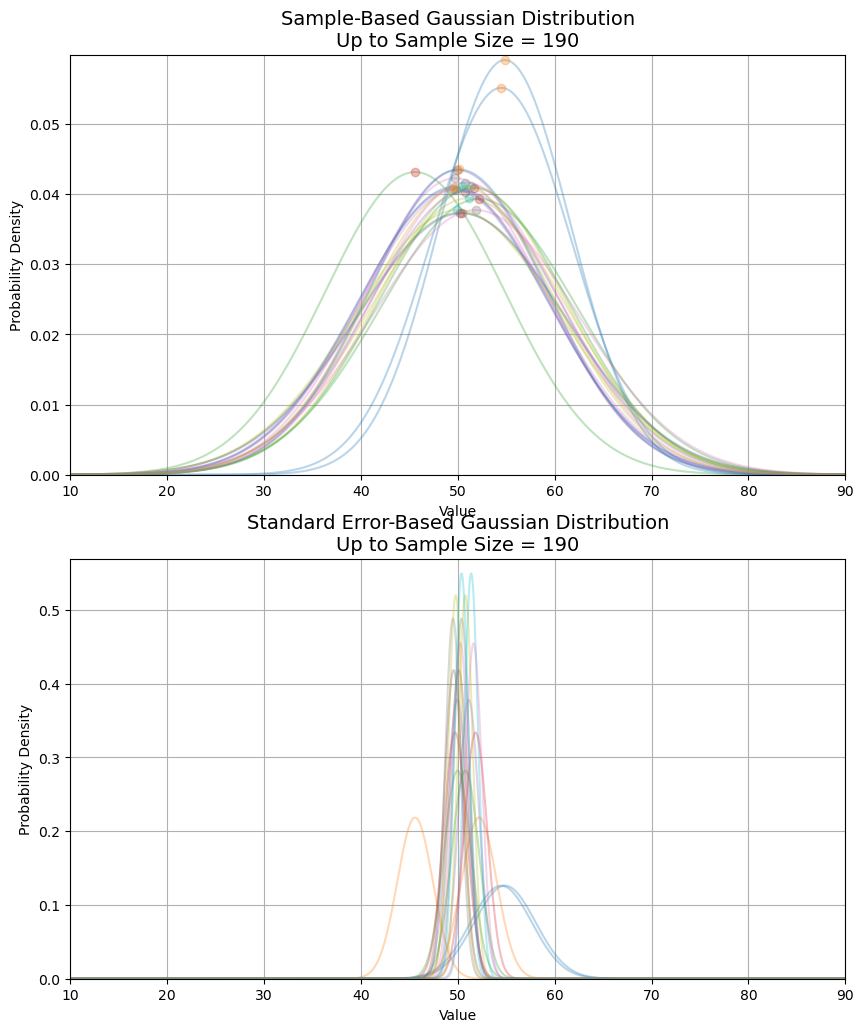

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Population parameters
population_mu = 50
population_sigma = 10

# Sample sizes to iterate over
sample_sizes = np.arange(10, 201, 20)  # From 10 to 100 in steps of 10

# Number of points for Gaussian curves
x_values = np.linspace(population_mu - 4*population_sigma, population_mu + 4*population_sigma, 1000)

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Lists to store line objects
lines1 = []
lines2 = []
points1 = []

# Initialization function
def init():
    # Set up the axes
    ax1.set_title('Sample-Based Gaussian Distribution', fontsize=14)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Probability Density')
    ax1.set_xlim(population_mu - 4*population_sigma, population_mu + 4*population_sigma)
    ax1.set_ylim(0, norm.pdf(population_mu, population_mu, population_sigma) + 0.02)
    ax1.grid(True)
    
    ax2.set_title('Standard Error-Based Gaussian Distribution', fontsize=14)
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Probability Density')
    ax2.set_xlim(population_mu - 4*population_sigma, population_mu + 4*population_sigma)
    ax2.set_ylim(0, norm.pdf(population_mu, population_mu, population_sigma/np.sqrt(10)) + 0.02)
    ax2.grid(True)
    
    return []


def animate(i):
    n = sample_sizes[i]
    
    # Draw a sample of size n from the population
    sample = np.random.normal(loc=population_mu, scale=population_sigma, size=n)
    
    # Calculate sample mean and sample standard deviation
    mu_est = np.mean(sample)
    sigma_est = np.std(sample, ddof=1)
    
    # Calculate Standard Error
    SE = population_sigma / np.sqrt(n)
    
    # Top Panel: Plot sample-based Gaussian
    y1 = norm.pdf(x_values, loc=mu_est, scale=sigma_est)
    line1, = ax1.plot(x_values, y1, alpha=0.3)
    point1, = ax1.plot([mu_est], [norm.pdf(mu_est, mu_est, sigma_est)], 'o', alpha=0.3)
    lines1.append(line1)
    points1.append(point1)
    
    # Bottom Panel: Plot SE-based Gaussian using estimated mean
    y2 = norm.pdf(x_values, loc=mu_est, scale=SE)
    line2, = ax2.plot(x_values, y2, alpha=0.3)
    lines2.append(line2)
    
    current_max = max(y2)
    ax2.set_ylim(0, current_max + 0.02)
    
    # Add annotation for current sample size
    ax1.set_title(f'Sample-Based Gaussian Distribution\nUp to Sample Size = {n}', fontsize=14)
    ax2.set_title(f'Standard Error-Based Gaussian Distribution\nUp to Sample Size = {n}', fontsize=14)
    
    return lines1 + points1 + lines2

# Create animation with init function
ani = animation.FuncAnimation(
    fig, animate, frames=len(sample_sizes), 
    init_func=init, interval=1000, blit=True, repeat=False
)

ani.save("animation.gif", writer="pillow")

# Save the animation as an MP4 file
ani.save('sd_vs_se_animation.mp4', writer='ffmpeg', fps=1)

plt.show()
